In [7]:
import pandas as pd
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Atmospheric Data Cleaned Instances Per Day.csv")

In [3]:
df.head()

,Year,Month,Day,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot
0,2023,5,1,42.098597,2.377042,0.378701,0.269903,32.476493,20.131194,19.830514,29.753889,2.439608,154.966895,804.314569,630.264466,0.0
1,2023,5,2,44.560389,1.889646,0.215486,0.244556,28.960708,18.765649,20.916111,27.642535,2.883990,231.153622,803.925649,659.373538,0.0
2,2023,5,3,50.777618,4.491722,0.745514,0.397743,49.597222,35.021854,21.357729,30.954847,1.604234,178.251752,803.767500,485.725435,0.0
3,2023,5,4,50.881806,4.101944,0.455646,0.384681,48.555437,35.872396,21.968729,35.661208,1.729689,183.150144,804.870299,422.336301,0.0
4,2023,5,5,52.673167,4.675542,0.458521,0.442660,52.817632,41.230729,21.668757,42.649750,1.900280,137.419527,805.930109,449.436559,0.2


In [5]:
df_subset = deepcopy(df[["PM2.5", "Rain_Tot"]])

In [6]:
df_subset["Rain_Tot"].describe()

count    315.000000
mean       1.455556
std        4.124742
min        0.000000
25%        0.000000
50%        0.000000
75%        0.300000
max       41.700000
Name: Rain_Tot, dtype: float64

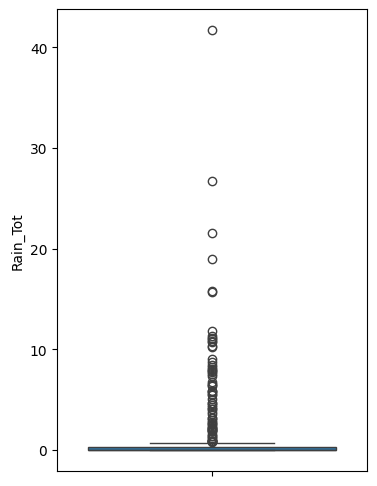

In [11]:
plt.figure(figsize=(4,6))
sns.boxplot(df_subset["Rain_Tot"])
plt.show()

In [12]:
def categories(x):
    if x == 0: return "No Rain"
    if x < 10: return "Rain"
    return "Heavy Rain"

In [13]:
df_subset["Weather"] = df_subset["Rain_Tot"].apply(categories)

In [14]:
df_subset.head()

,PM2.5,Rain_Tot,Weather
0,20.131194,0.0,No Rain
1,18.765649,0.0,No Rain
2,35.021854,0.0,No Rain
3,35.872396,0.0,No Rain
4,41.230729,0.2,Rain


In [15]:
df_subset["Weather"].value_counts()

Weather
No Rain       224
Rain           77
Heavy Rain     14
Name: count, dtype: int64

In [16]:
df_subset.to_csv("PM2.5_Rain_3_categories.csv", index=False)